Cluster Centroids:
[[188  13]
 [511  14]
 [835  15]]

Cluster Sizes:
Cluster 1: 63 customers
Cluster 2: 68 customers
Cluster 3: 69 customers


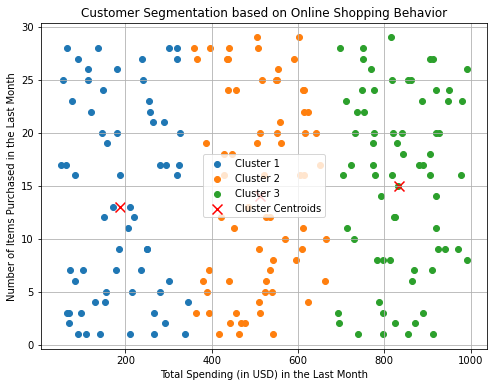

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def k_means(data, k, max_iterations=100, tolerance=1e-4):
    # Ensure data is a numpy array
    data = np.array(data)
    
    # Randomly initialize cluster centroids
    centroids = data[random.sample(range(len(data)), k)]
    
    for _ in range(max_iterations):
        # Assign data points to the nearest centroids
        clusters = [[] for _ in range(k)]
        for point in data:
            distances = [euclidean_distance(point, centroid) for centroid in centroids]
            nearest_centroid = np.argmin(distances)
            clusters[nearest_centroid].append(point)
        
        # Store the previous centroids and update cluster centroids
        prev_centroids = centroids.copy()
        for i in range(k):
            if len(clusters[i]) > 0:
                centroids[i] = np.mean(clusters[i], axis=0)
        
        # Check for convergence
        centroid_shift = np.sum(np.abs(centroids - prev_centroids))
        if centroid_shift < tolerance:
            break
    
    return centroids, clusters
    
def visualize_clusters(centroids, clusters):
    plt.figure(figsize=(8, 6))
    for i, cluster in enumerate(clusters):
        cluster_data = np.array(cluster)
        plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f"Cluster {i + 1}")

    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Cluster Centroids')
    plt.title("Customer Segmentation based on Online Shopping Behavior")
    plt.xlabel("Total Spending (in USD) in the Last Month")
    plt.ylabel("Number of Items Purchased in the Last Month")
    plt.legend()
    plt.grid(True)
    plt.show()

# Assuming an everyday kind of dataset related to online shopping
# Generating synthetic data for illustration purposes.
np.random.seed(42)
num_customers = 200
total_spending = np.random.randint(50, 1000, num_customers)
num_items_purchased = np.random.randint(1, 30, num_customers)
data = np.column_stack((total_spending, num_items_purchased))

# Choosing the number of clusters (for illustration purposes, let's say 3 clusters)
num_clusters = 3

# Running k-means with the given data
centroids, clusters = k_means(data, num_clusters)

# Printing cluster centroids and sizes
print("Cluster Centroids:")
print(centroids)
print("\nCluster Sizes:")
for i, cluster in enumerate(clusters):
    print(f"Cluster {i + 1}: {len(cluster)} customers")

# Visualizing the clusters
visualize_clusters(centroids, clusters)

Cluster Centroids:
[[511  14]
 [835  15]
 [188  13]]

Cluster Sizes:
Cluster 1: 68 customers
Cluster 2: 69 customers
Cluster 3: 63 customers


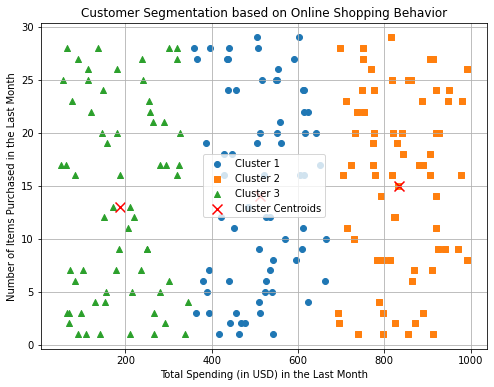

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KernelDensity

def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def k_means(data, k, max_iterations=100, tolerance=1e-4):
    # Ensure data is a numpy array
    data = np.array(data)
    
    # Randomly initialize cluster centroids
    centroids = data[random.sample(range(len(data)), k)]
    
    for _ in range(max_iterations):
        # Assign data points to the nearest centroids
        clusters = [[] for _ in range(k)]
        for point in data:
            distances = [euclidean_distance(point, centroid) for centroid in centroids]
            nearest_centroid = np.argmin(distances)
            clusters[nearest_centroid].append(point)
        
        # Store the previous centroids and update cluster centroids
        prev_centroids = centroids.copy()
        for i in range(k):
            if len(clusters[i]) > 0:
                centroids[i] = np.mean(clusters[i], axis=0)
        
        # Check for convergence
        centroid_shift = np.sum(np.abs(centroids - prev_centroids))
        if centroid_shift < tolerance:
            break
    
    return centroids, clusters

def visualize_clusters(centroids, clusters):
    plt.figure(figsize=(8, 6))
    
    # Plotting data points for each cluster with different colors and markers
    markers = ['o', 's', '^', 'v', 'D', 'p', 'X', '<', '>', 'P']  # List of markers for each cluster
    for i, cluster in enumerate(clusters):
        cluster_data = np.array(cluster)
        plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f"Cluster {i + 1}", marker=markers[i % len(markers)])
    
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Cluster Centroids')
    plt.title("Customer Segmentation based on Online Shopping Behavior")
    plt.xlabel("Total Spending (in USD) in the Last Month")
    plt.ylabel("Number of Items Purchased in the Last Month")
    plt.legend()
    plt.grid(True)
    plt.show()

# Assuming an everyday kind of dataset related to online shopping
# Generating synthetic data for illustration purposes.
np.random.seed(42)
num_customers = 200
total_spending = np.random.randint(50, 1000, num_customers)
num_items_purchased = np.random.randint(1, 30, num_customers)
data = np.column_stack((total_spending, num_items_purchased))

# Choosing the number of clusters (for illustration purposes, let's say 3 clusters)
num_clusters = 3

# Running k-means with the given data
centroids, clusters = k_means(data, num_clusters)

# Printing the cluster centroids and sizes
print("Cluster Centroids:")
print(centroids)
print("\nCluster Sizes:")
for i, cluster in enumerate(clusters):
    print(f"Cluster {i + 1}: {len(cluster)} customers")

# Visualizing the clusters
visualize_clusters(centroids, clusters)

<b><font size="20">HIERARCHICHAL CLUSTERING</font></b>

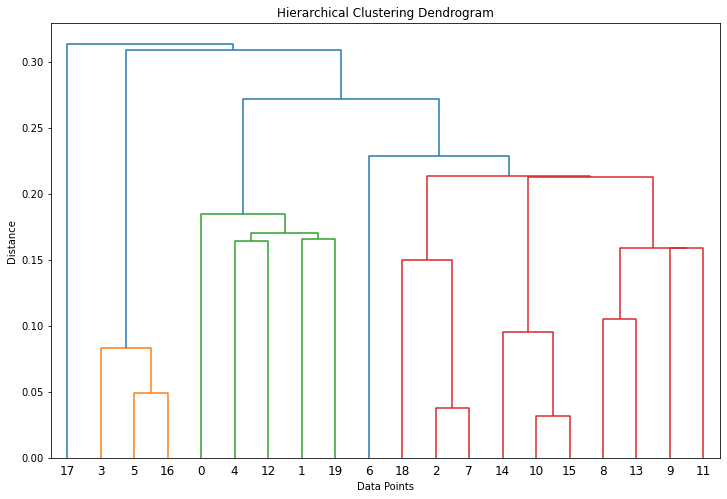

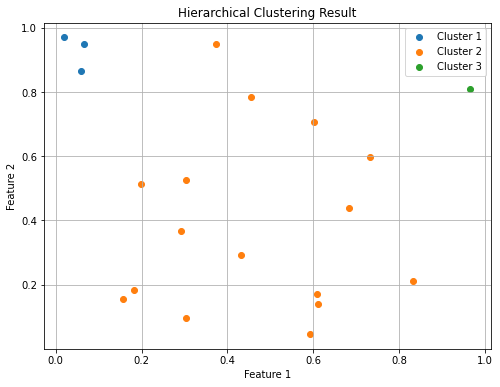

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

def hierarchical_clustering(data, linkage_method='single'):
    # Ensure data is a numpy array
    data = np.array(data)
    
    # Perform hierarchical clustering using specified linkage method
    Z = linkage(data, method=linkage_method)
    
    return Z

def visualize_dendrogram(Z, labels=None):
    plt.figure(figsize=(12, 8))
    dendrogram(Z, labels=labels)
    plt.title("Hierarchical Clustering Dendrogram")
    plt.xlabel("Data Points")
    plt.ylabel("Distance")
    plt.show()

def cut_tree(Z, num_clusters):
    return fcluster(Z, num_clusters, criterion='maxclust')

def visualize_clusters(data, clusters, centroids=None):
    plt.figure(figsize=(8, 6))
    if centroids is not None:
        plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Cluster Centroids')
    
    for cluster_id in np.unique(clusters):
        cluster_data = data[clusters == cluster_id]
        plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f"Cluster {cluster_id}")
        
    plt.title("Hierarchical Clustering Result")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.grid(True)
    plt.show()

# Example data
np.random.seed(42)
num_points = 20
data = np.random.rand(num_points, 2)

# Running hierarchical clustering with the given data and single linkage
Z = hierarchical_clustering(data, linkage_method='single')

# Visualizing the dendrogram
visualize_dendrogram(Z)

# Choose the number of clusters by cutting the dendrogram
num_clusters = 3
clusters = cut_tree(Z, num_clusters)

# Visualize the resulting clusters
visualize_clusters(data, clusters)
